This model is trained over masked dataset . and test over masked, unmasked and unknown images to the model

In [ ]:
from tensorflow import keras
from keras.models import Model
from keras.models import Sequential
from keras.layers import Dense,Flatten , Input ,Lambda

In [ ]:
from keras.applications.resnet import ResNet50
from keras.applications.resnet import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import  ImageDataGenerator

In [ ]:
from keras.utils import load_img
from keras.utils import array_to_img

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
import pandas as pd

In [ ]:
import os
import random
import shutil


In [ ]:
from sklearn.model_selection import train_test_split
from shutil import copyfile

In [ ]:
# Set the path to your folder containing unmasked images
dataset_folder = "/content/drive/MyDrive/1. Colab Notebooks/5. June 2023/2. Internship/MODEL5 - Resnet50 Unmasked train-set/Face dataset/1. FACE MASKED DATASET(train and validation)"

# Set the output paths for train and validation folders
train_folder = '/content/drive/MyDrive/1. Colab Notebooks/5. June 2023/2. Internship/MODEL5 - Resnet50 Unmasked train-set/Face dataset/train'
val_folder = '/content/drive/MyDrive/1. Colab Notebooks/5. June 2023/2. Internship/MODEL5 - Resnet50 Unmasked train-set/Face dataset/validation'

# Set the desired split ratio
split_ratio = 0.8


In [ ]:
for person_folder in os.listdir(dataset_folder):
    person_path = os.path.join(dataset_folder, person_folder)

    if os.path.isdir(person_path):
        # Create corresponding folders in train and validation sets
        train_person_path = os.path.join(train_folder, person_folder)
        val_person_path = os.path.join(val_folder, person_folder)
        os.makedirs(train_person_path, exist_ok=True)
        os.makedirs(val_person_path, exist_ok=True)

        # Iterate through images in the person's folder
        images = os.listdir(person_path)
        random.shuffle(images)

        # Split the images based on the desired ratio
        split_index = int(len(images) * split_ratio)
        train_images = images[:split_index]
        val_images = images[split_index:]

        # Move images to the corresponding folders
        for image in train_images:
            src_path = os.path.join(person_path, image)
            dst_path = os.path.join(train_person_path, image)
            shutil.move(src_path, dst_path)

        for image in val_images:
            src_path = os.path.join(person_path, image)
            dst_path = os.path.join(val_person_path, image)
            shutil.move(src_path, dst_path)

In [ ]:
# LOAD RESNET50 MODEL
model = ResNet50(input_shape=(224,224, 3) ,weights = 'imagenet', include_top = False)

94765736/94765736 [==============================] - 0s 0us/step


In [ ]:
for layer in model.layers:
  layer.trainable= False

In [ ]:
x = Flatten()(model.output)

In [ ]:
Folder= glob("/content/drive/MyDrive/1. Colab Notebooks/5. June 2023/2. Internship/MODEL5 - Resnet50 Unmasked train-set/Face dataset/train/*")

In [ ]:
y=len(Folder)

In [ ]:
print(y)

16


In [ ]:
output = Dense(y,activation="softmax")(x)

In [ ]:
model = Model(inputs = model.input,outputs= output)

In [ ]:
model.compile(
        loss = 'categorical_crossentropy',
        optimizer = 'adam',
        metrics = ['accuracy']
        )

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the data generators for train and test sets
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)


# Load the train and test datasets
train_data = train_datagen.flow_from_directory(
    "/content/drive/MyDrive/1. Colab Notebooks/5. June 2023/2. Internship/MODEL5 - Resnet50 Unmasked train-set/Face dataset/train",
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

validation_data = validation_datagen.flow_from_directory(
   "/content/drive/MyDrive/1. Colab Notebooks/5. June 2023/2. Internship/MODEL5 - Resnet50 Unmasked train-set/Face dataset/validation",
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

test_data = test_datagen.flow_from_directory(
    "/content/drive/MyDrive/1. Colab Notebooks/5. June 2023/2. Internship/MODEL5 - Resnet50 Unmasked train-set/Face dataset/2. FACE UNMASKED DATASET (test)",
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)


Found 144 images belonging to 16 classes.
Found 32 images belonging to 16 classes.
Found 176 images belonging to 16 classes.


In [ ]:
final_model = model.fit(
    train_data,
    validation_data=validation_data,
    epochs=30,
    steps_per_epoch=len(train_data),
    validation_steps=len(validation_data)
)

Epoch 1/30
5/5 [==============================] - 95s 16s/step - loss: 11.5335 - accuracy: 0.0764 - val_loss: 11.4515 - val_accuracy: 0.0625
Epoch 2/30
5/5 [==============================] - 26s 5s/step - loss: 11.9745 - accuracy: 0.0625 - val_loss: 14.1334 - val_accuracy: 0.0625
Epoch 3/30
5/5 [==============================] - 26s 5s/step - loss: 12.7307 - accuracy: 0.0625 - val_loss: 9.4477 - val_accuracy: 0.1250
Epoch 4/30
5/5 [==============================] - 26s 5s/step - loss: 9.6185 - accuracy: 0.2083 - val_loss: 8.8998 - val_accuracy: 0.2500
Epoch 5/30
5/5 [==============================] - 26s 6s/step - loss: 5.8305 - accuracy: 0.2917 - val_loss: 3.9862 - val_accuracy: 0.3438
Epoch 6/30
5/5 [==============================] - 27s 6s/step - loss: 3.4523 - accuracy: 0.3125 - val_loss: 2.7175 - val_accuracy: 0.3438
Epoch 7/30
5/5 [==============================] - 27s 6s/step - loss: 2.0612 - accuracy: 0.4306 - val_loss: 2.1292 - val_accuracy: 0.4688
Epoch 8/30
5/5 [============

In [ ]:
# Evaluate on the test set  - ResNet50
test_loss, test_accuracy = model.evaluate(test_data)

print("Test loss:", int(test_loss*100))
print("Test accuracy:", int(test_accuracy*100))

6/6 [==============================] - 86s 16s/step - loss: 0.3276 - accuracy: 0.9432
Test loss: 32
Test accuracy: 94


## Save Model

In [ ]:
from tensorflow import keras

In [ ]:
model.save("/content/drive/MyDrive/1. Colab Notebooks/5. June 2023/2. Internship/MODEL5 - Resnet50 Unmasked train-set/model.h5")

## Load Model

In [ ]:
model = keras.models.load_model("/content/drive/MyDrive/1. Colab Notebooks/5. June 2023/2. Internship/MODEL5 - Resnet50 Unmasked train-set/model.h5")

### Get class name of model

In [ ]:
# Get the class names from the directory structure
class_names = sorted(os.listdir('/content/drive/MyDrive/1. Colab Notebooks/5. June 2023/2. Internship/MODEL5 - Resnet50 Unmasked train-set/Face dataset/train'))

# --------------------------TESTING ON SINGLE IMAGES ONE BY ONE---------------------------------

## 1.  Test over Known unmasked and unknown unmasked images

### 1.(a) Known

In [ ]:
import tensorflow as tf


In [ ]:
image_path =  "/content/drive/MyDrive/1. Colab Notebooks/5. June 2023/2. Internship/MODEL5 - Resnet50 Unmasked train-set/Face dataset/4. Unmasked test image/Copy of 1.jpg"

# Preprocess the image
image = tf.keras.preprocessing.image.load_img(image_path, target_size=(224, 224))
image = tf.keras.preprocessing.image.img_to_array(image)
image = image / 255.0

# Expand dimensions to match the input shape expected by the model
image = np.expand_dims(image, axis=0)

# Forward pass
predictions = model.predict(image)

# Interpret the results
class_index = np.argmax(predictions, axis=1)
class_probability = np.max(predictions, axis=1)

# Interpret the results
class_index = np.argmax(predictions, axis=1)
class_probability = np.max(predictions, axis=1)
predicted_class_name = class_names[class_index[0]]

# Print the predicted class label, class name, and probability
print("Test Image:", image_path)
print("Predicted class:", predicted_class_name)
print("Probability:", class_probability[0])
print("Predicted class:", class_index[0])

1/1 [==============================] - 1s 1s/step
Test Image: /content/drive/MyDrive/1. Colab Notebooks/5. June 2023/2. Internship/MODEL5 - Resnet50 Unmasked train-set/Face dataset/4. Unmasked test image/Copy of 1.jpg
Predicted class: Abhishek
Probability: 0.9986345
Predicted class: 0


In [ ]:
image_path =  "/content/drive/MyDrive/1. Colab Notebooks/5. June 2023/2. Internship/MODEL5 - Resnet50 Unmasked train-set/Face dataset/4. Unmasked test image/Copy of 2.jpg"

# Preprocess the image
image = tf.keras.preprocessing.image.load_img(image_path, target_size=(224, 224))
image = tf.keras.preprocessing.image.img_to_array(image)
image = image / 255.0

# Expand dimensions to match the input shape expected by the model
image = np.expand_dims(image, axis=0)

# Forward pass
predictions = model.predict(image)

# Interpret the results
class_index = np.argmax(predictions, axis=1)
class_probability = np.max(predictions, axis=1)

# Interpret the results
class_index = np.argmax(predictions, axis=1)
class_probability = np.max(predictions, axis=1)
predicted_class_name = class_names[class_index[0]]

# Print the predicted class label, class name, and probability
print("Test Image:", image_path)
print("Predicted class:", predicted_class_name)
print("Probability:", class_probability[0])
print("Predicted class:", class_index[0])

1/1 [==============================] - 0s 47ms/step
Test Image: /content/drive/MyDrive/1. Colab Notebooks/5. June 2023/2. Internship/MODEL5 - Resnet50 Unmasked train-set/Face dataset/4. Unmasked test image/Copy of 2.jpg
Predicted class: Abhishek
Probability: 0.9973538
Predicted class: 0


In [ ]:
image_path =  "/content/drive/MyDrive/1. Colab Notebooks/5. June 2023/2. Internship/MODEL5 - Resnet50 Unmasked train-set/Face dataset/4. Unmasked test image/Anna 2.jpg"

# Preprocess the image
image = tf.keras.preprocessing.image.load_img(image_path, target_size=(224, 224))
image = tf.keras.preprocessing.image.img_to_array(image)
image = image / 255.0

# Expand dimensions to match the input shape expected by the model
image = np.expand_dims(image, axis=0)

# Forward pass
predictions = model.predict(image)

# Interpret the results
class_index = np.argmax(predictions, axis=1)
class_probability = np.max(predictions, axis=1)

# Interpret the results
class_index = np.argmax(predictions, axis=1)
class_probability = np.max(predictions, axis=1)
predicted_class_name = class_names[class_index[0]]

# Print the predicted class label, class name, and probability
print("Test Image:", image_path)
print("Predicted class:", predicted_class_name)
print("Probability:", class_probability[0])
print("Predicted class:", class_index[0])

1/1 [==============================] - 0s 23ms/step
Test Image: /content/drive/MyDrive/1. Colab Notebooks/5. June 2023/2. Internship/MODEL5 - Resnet50 Unmasked train-set/Face dataset/4. Unmasked test image/Anna 2.jpg
Predicted class: Anna
Probability: 0.91402215
Predicted class: 3


In [ ]:
image_path =  "/content/drive/MyDrive/1. Colab Notebooks/5. June 2023/2. Internship/MODEL5 - Resnet50 Unmasked train-set/Face dataset/4. Unmasked test image/Anna1.jpg"

# Preprocess the image
image = tf.keras.preprocessing.image.load_img(image_path, target_size=(224, 224))
image = tf.keras.preprocessing.image.img_to_array(image)
image = image / 255.0

# Expand dimensions to match the input shape expected by the model
image = np.expand_dims(image, axis=0)

# Forward pass
predictions = model.predict(image)

# Interpret the results
class_index = np.argmax(predictions, axis=1)
class_probability = np.max(predictions, axis=1)

# Interpret the results
class_index = np.argmax(predictions, axis=1)
class_probability = np.max(predictions, axis=1)
predicted_class_name = class_names[class_index[0]]

# Print the predicted class label, class name, and probability
print("Test Image:", image_path)
print("Predicted class:", predicted_class_name)
print("Probability:", class_probability[0])
print("Predicted class:", class_index[0])

1/1 [==============================] - 0s 33ms/step
Test Image: /content/drive/MyDrive/1. Colab Notebooks/5. June 2023/2. Internship/MODEL5 - Resnet50 Unmasked train-set/Face dataset/4. Unmasked test image/Anna1.jpg
Predicted class: Anna
Probability: 0.98524797
Predicted class: 3


## 1.(a) Unknown

In [ ]:
image_path =  "/content/drive/MyDrive/1. Colab Notebooks/5. June 2023/2. Internship/MODEL5 - Resnet50 Unmasked train-set/Face dataset/4. Unmasked test image/varun (Unknown) .jpg"

# Preprocess the image
image = tf.keras.preprocessing.image.load_img(image_path, target_size=(224, 224))
image = tf.keras.preprocessing.image.img_to_array(image)
image = image / 255.0

# Expand dimensions to match the input shape expected by the model
image = np.expand_dims(image, axis=0)

# Forward pass
predictions = model.predict(image)

# Interpret the results
class_index = np.argmax(predictions, axis=1)
class_probability = np.max(predictions, axis=1)

# Interpret the results
class_index = np.argmax(predictions, axis=1)
class_probability = np.max(predictions, axis=1)
predicted_class_name = class_names[class_index[0]]

# Print the predicted class label, class name, and probability
print("Test Image:", image_path)
print("Predicted class:", predicted_class_name)
print("Probability:", class_probability[0])
print("Predicted class:", class_index[0])


1/1 [==============================] - 0s 38ms/step
Test Image: /content/drive/MyDrive/1. Colab Notebooks/5. June 2023/2. Internship/MODEL5 - Resnet50 Unmasked train-set/Face dataset/4. Unmasked test image/varun (Unknown) .jpg
Predicted class: Rahul_kumar
Probability: 0.2557677
Predicted class: 12


# Test over masked images

In [ ]:
image_path =  "/content/drive/MyDrive/1. Colab Notebooks/5. June 2023/2. Internship/MODEL5 - Resnet50 Unmasked train-set/Face dataset/3. Masked test /Abhishek m1.jpg"

# Preprocess the image
image = tf.keras.preprocessing.image.load_img(image_path, target_size=(224, 224))
image = tf.keras.preprocessing.image.img_to_array(image)
image = image / 255.0

# Expand dimensions to match the input shape expected by the model
image = np.expand_dims(image, axis=0)

# Forward pass
predictions = model.predict(image)

# Interpret the results
class_index = np.argmax(predictions, axis=1)
class_probability = np.max(predictions, axis=1)

# Interpret the results
class_index = np.argmax(predictions, axis=1)
class_probability = np.max(predictions, axis=1)
predicted_class_name = class_names[class_index[0]]

# Print the predicted class label, class name, and probability
print("Test Image:", image_path)
print("Predicted class:", predicted_class_name)
print("Probability:", class_probability[0])
print("Predicted class:", class_index[0])


1/1 [==============================] - 0s 116ms/step
Test Image: /content/drive/MyDrive/1. Colab Notebooks/5. June 2023/2. Internship/MODEL5 - Resnet50 Unmasked train-set/Face dataset/3. Masked test /Abhishek m1.jpg
Predicted class: Abhishek
Probability: 0.99916196
Predicted class: 0


In [ ]:
image_path =  "/content/drive/MyDrive/1. Colab Notebooks/5. June 2023/2. Internship/MODEL5 - Resnet50 Unmasked train-set/Face dataset/3. Masked test /Anna m2.jpg"

# Preprocess the image
image = tf.keras.preprocessing.image.load_img(image_path, target_size=(224, 224))
image = tf.keras.preprocessing.image.img_to_array(image)
image = image / 255.0

# Expand dimensions to match the input shape expected by the model
image = np.expand_dims(image, axis=0)

# Forward pass
predictions = model.predict(image)

# Interpret the results
class_index = np.argmax(predictions, axis=1)
class_probability = np.max(predictions, axis=1)

# Interpret the results
class_index = np.argmax(predictions, axis=1)
class_probability = np.max(predictions, axis=1)
predicted_class_name = class_names[class_index[0]]

# Print the predicted class label, class name, and probability
print("Test Image:", image_path)
print("Predicted class:", predicted_class_name)
print("Probability:", class_probability[0])
print("Predicted class:", class_index[0])


1/1 [==============================] - 0s 59ms/step
Test Image: /content/drive/MyDrive/1. Colab Notebooks/5. June 2023/2. Internship/MODEL5 - Resnet50 Unmasked train-set/Face dataset/3. Masked test /Anna m2.jpg
Predicted class: Anna
Probability: 0.91889894
Predicted class: 3


Unknown masked

In [ ]:
image_path =  "/content/drive/MyDrive/1. Colab Notebooks/5. June 2023/2. Internship/MODEL5 - Resnet50 Unmasked train-set/Face dataset/3. Masked test /Varun masked1(Unknown).jpg"

# Preprocess the image
image = tf.keras.preprocessing.image.load_img(image_path, target_size=(224, 224))
image = tf.keras.preprocessing.image.img_to_array(image)
image = image / 255.0

# Expand dimensions to match the input shape expected by the model
image = np.expand_dims(image, axis=0)

# Forward pass
predictions = model.predict(image)

# Interpret the results
class_index = np.argmax(predictions, axis=1)
class_probability = np.max(predictions, axis=1)

# Interpret the results
class_index = np.argmax(predictions, axis=1)
class_probability = np.max(predictions, axis=1)
predicted_class_name = class_names[class_index[0]]

# Print the predicted class label, class name, and probability
print("Test Image:", image_path)
print("Predicted class:", predicted_class_name)
print("Probability:", class_probability[0])
print("Predicted class:", class_index[0])


1/1 [==============================] - 0s 82ms/step
Test Image: /content/drive/MyDrive/1. Colab Notebooks/5. June 2023/2. Internship/MODEL5 - Resnet50 Unmasked train-set/Face dataset/3. Masked test /Varun masked1(Unknown).jpg
Predicted class: Digant
Probability: 0.42114058
Predicted class: 5


## --------------------COSINE SIMILARITY USING ResNet50-------------------------

In [ ]:
import os
import numpy as np
from PIL import Image
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.resnet50 import preprocess_input
from sklearn.metrics.pairwise import cosine_similarity

## Unmasked image test

In [ ]:
# Load the trained ResNet50 model
model1 = ResNet50(weights='imagenet', include_top=False)

Abhishek

In [ ]:
# Set the paths for the train set and test image
train_set_path = '//content/drive/MyDrive/1. Colab Notebooks/5. June 2023/2. Internship/MODEL5 - Resnet50 Unmasked train-set/Face dataset/train'
test_image_path = '/content/drive/MyDrive/1. Colab Notebooks/5. June 2023/2. Internship/MODEL5 - Resnet50 Unmasked train-set/Face dataset/4. Unmasked test image/Abhishek1.jpg'

In [ ]:
# Load and preprocess the test image
test_image = load_img(test_image_path, target_size=(224, 224))
test_image = img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
test_image = preprocess_input(test_image)

# Extract features from the test image
test_features = model1.predict(test_image)

test_features = test_features.reshape(1, -1)

# Initialize an empty list to store similarity scores
similarity_scores = []


# Iterate through the train set folders
for folder_name in os.listdir(train_set_path):
    folder_path = os.path.join(train_set_path, folder_name)

# Iterate through the images in each folder
    for file_name in os.listdir(folder_path):
        image_path = os.path.join(folder_path, file_name)

        # Load and preprocess the train image
        train_image = load_img(image_path, target_size=(224, 224))
        train_image = img_to_array(train_image)
        train_image = np.expand_dims(train_image, axis=0)
        train_image = preprocess_input(train_image)

        # Extract features from the train image
        train_features = model1.predict(train_image)
        train_features = train_features.reshape(1, -1)

        # Compute cosine similarity between the test and train images
        similarity_score = cosine_similarity(test_features, train_features)[0][0]

        # Append the similarity score to the list
        similarity_scores.append((image_path, similarity_score))


1/1 [==============================] - 0s 22ms/step


In [ ]:
# Sort the similarity scores in descending order
similarity_scores.sort(key=lambda x: x[1], reverse=True)

# Print the top 10 matched images with their similarity scores
for i in range(20):
    image_path, similarity_score = similarity_scores[i]
    similarity_percentage = similarity_score * 100
    print(f"Similarity: {similarity_percentage:.2f}% - Image: {image_path}")

Similarity: 50.28% - Image: //content/drive/MyDrive/1. Colab Notebooks/5. June 2023/2. Internship/MODEL5 - Resnet50 Unmasked train-set/Face dataset/train/Abhishek/m6.jpg
Similarity: 48.70% - Image: //content/drive/MyDrive/1. Colab Notebooks/5. June 2023/2. Internship/MODEL5 - Resnet50 Unmasked train-set/Face dataset/train/Abhishek/m5.jpg
Similarity: 45.80% - Image: //content/drive/MyDrive/1. Colab Notebooks/5. June 2023/2. Internship/MODEL5 - Resnet50 Unmasked train-set/Face dataset/train/Abhishek/m9.jpg
Similarity: 44.88% - Image: //content/drive/MyDrive/1. Colab Notebooks/5. June 2023/2. Internship/MODEL5 - Resnet50 Unmasked train-set/Face dataset/train/Abhishek/m3.jpg
Similarity: 44.65% - Image: //content/drive/MyDrive/1. Colab Notebooks/5. June 2023/2. Internship/MODEL5 - Resnet50 Unmasked train-set/Face dataset/train/Abhishek/m1.jpg
Similarity: 43.78% - Image: //content/drive/MyDrive/1. Colab Notebooks/5. June 2023/2. Internship/MODEL5 - Resnet50 Unmasked train-set/Face dataset/tr

In [ ]:
test_image_path = '/content/drive/MyDrive/1. Colab Notebooks/5. June 2023/2. Internship/MODEL5 - Resnet50 Unmasked train-set/Face dataset/4. Unmasked test image/Abhishek2.jpg'


# Load and preprocess the test image
test_image = load_img(test_image_path, target_size=(224, 224))
test_image = img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
test_image = preprocess_input(test_image)

# Extract features from the test image
test_features = model1.predict(test_image)
test_features = test_features.reshape(1, -1)

# Initialize an empty list to store similarity scores
similarity_scores = []

# Iterate through the train set folders
for folder_name in os.listdir(train_set_path):
    folder_path = os.path.join(train_set_path, folder_name)

# Iterate through the images in each folder
    for file_name in os.listdir(folder_path):
        image_path = os.path.join(folder_path, file_name)

        # Load and preprocess the train image
        train_image = load_img(image_path, target_size=(224, 224))
        train_image = img_to_array(train_image)
        train_image = np.expand_dims(train_image, axis=0)
        train_image = preprocess_input(train_image)

        # Extract features from the train image
        train_features = model1.predict(train_image)
        train_features = train_features.reshape(1, -1)

        # Compute cosine similarity between the test and train images
        similarity_score = cosine_similarity(test_features, train_features)[0][0]

        # Append the similarity score to the list
        similarity_scores.append((image_path, similarity_score))

# Sort the similarity scores in descending order
similarity_scores.sort(key=lambda x: x[1], reverse=True)

# Print the top 10 matched images with their similarity scores
for i in range(20):
    image_path, similarity_score = similarity_scores[i]
    similarity_percentage = similarity_score * 100
    print(f"Similarity: {similarity_percentage:.2f}% - Image: {image_path}")

1/1 [==============================] - 0s 39ms/step
Similarity: 50.06% - Image: //content/drive/MyDrive/1. Colab Notebooks/5. June 2023/2. Internship/MODEL5 - Resnet50 Unmasked train-set/Face dataset/train/Abhishek/m5.jpg
Similarity: 49.76% - Image: //content/drive/MyDrive/1. Colab Notebooks/5. June 2023/2. Internship/MODEL5 - Resnet50 Unmasked train-set/Face dataset/train/Abhishek/m3.jpg
Similarity: 48.41% - Image: //content/drive/MyDrive/1. Colab Notebooks/5. June 2023/2. Internship/MODEL5 - Resnet50 Unmasked train-set/Face dataset/train/Abhishek/m6.jpg
Similarity: 46.28% - Image: //content/drive/MyDrive/1. Colab Notebooks/5. June 2023/2. Internship/MODEL5 - Resnet50 Unmasked train-set/Face dataset/train/Abhishek/m10.jpg
Similarity: 43.59% - Image: //content/drive/MyDrive/1. Colab Notebooks/5. June 2023/2. Internship/MODEL5 - Resnet50 Unmasked train-set/Face dataset/train/Abhishek/m2.jpg
Similarity: 43.21% - Image: //content/drive/MyDrive/1. Colab Notebooks/5. June 2023/2. Internship

###ANNA

In [ ]:
test_image_path = '/content/drive/MyDrive/1. Colab Notebooks/5. June 2023/2. Internship/MODEL5 - Resnet50 Unmasked train-set/Face dataset/4. Unmasked test image/Anna 2.jpg'


# Load and preprocess the test image
test_image = load_img(test_image_path, target_size=(224, 224))
test_image = img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
test_image = preprocess_input(test_image)

# Extract features from the test image
test_features = model1.predict(test_image)
test_features = test_features.reshape(1, -1)

# Initialize an empty list to store similarity scores
similarity_scores = []

# Iterate through the train set folders
for folder_name in os.listdir(train_set_path):
    folder_path = os.path.join(train_set_path, folder_name)

# Iterate through the images in each folder
    for file_name in os.listdir(folder_path):
        image_path = os.path.join(folder_path, file_name)

        # Load and preprocess the train image
        train_image = load_img(image_path, target_size=(224, 224))
        train_image = img_to_array(train_image)
        train_image = np.expand_dims(train_image, axis=0)
        train_image = preprocess_input(train_image)

        # Extract features from the train image
        train_features = model1.predict(train_image)
        train_features = train_features.reshape(1, -1)

        # Compute cosine similarity between the test and train images
        similarity_score = cosine_similarity(test_features, train_features)[0][0]

        # Append the similarity score to the list
        similarity_scores.append((image_path, similarity_score))

# Sort the similarity scores in descending order
similarity_scores.sort(key=lambda x: x[1], reverse=True)

# Print the top 10 matched images with their similarity scores
for i in range(20):
    image_path, similarity_score = similarity_scores[i]
    similarity_percentage = similarity_score * 100
    print(f"Similarity: {similarity_percentage:.2f}% - Image: {image_path}")

1/1 [==============================] - 0s 23ms/step
Similarity: 51.62% - Image: //content/drive/MyDrive/1. Colab Notebooks/5. June 2023/2. Internship/MODEL5 - Resnet50 Unmasked train-set/Face dataset/train/Anna/m8.jpg
Similarity: 50.86% - Image: //content/drive/MyDrive/1. Colab Notebooks/5. June 2023/2. Internship/MODEL5 - Resnet50 Unmasked train-set/Face dataset/train/Anna/m3.jpg
Similarity: 49.32% - Image: //content/drive/MyDrive/1. Colab Notebooks/5. June 2023/2. Internship/MODEL5 - Resnet50 Unmasked train-set/Face dataset/train/Anna/m7.jpg
Similarity: 49.02% - Image: //content/drive/MyDrive/1. Colab Notebooks/5. June 2023/2. Internship/MODEL5 - Resnet50 Unmasked train-set/Face dataset/train/Anna/m5.jpg
Similarity: 47.20% - Image: //content/drive/MyDrive/1. Colab Notebooks/5. June 2023/2. Internship/MODEL5 - Resnet50 Unmasked train-set/Face dataset/train/Anna/m9.jpg
Similarity: 46.47% - Image: //content/drive/MyDrive/1. Colab Notebooks/5. June 2023/2. Internship/MODEL5 - Resnet50 Un

In [ ]:
test_image_path = '/content/drive/MyDrive/1. Colab Notebooks/5. June 2023/2. Internship/MODEL5 - Resnet50 Unmasked train-set/Face dataset/4. Unmasked test image/Anna1.jpg'


# Load and preprocess the test image
test_image = load_img(test_image_path, target_size=(224, 224))
test_image = img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
test_image = preprocess_input(test_image)

# Extract features from the test image
test_features = model1.predict(test_image)
test_features = test_features.reshape(1, -1)

# Initialize an empty list to store similarity scores
similarity_scores = []

# Iterate through the train set folders
for folder_name in os.listdir(train_set_path):
    folder_path = os.path.join(train_set_path, folder_name)

# Iterate through the images in each folder
    for file_name in os.listdir(folder_path):
        image_path = os.path.join(folder_path, file_name)

        # Load and preprocess the train image
        train_image = load_img(image_path, target_size=(224, 224))
        train_image = img_to_array(train_image)
        train_image = np.expand_dims(train_image, axis=0)
        train_image = preprocess_input(train_image)

        # Extract features from the train image
        train_features = model1.predict(train_image)
        train_features = train_features.reshape(1, -1)

        # Compute cosine similarity between the test and train images
        similarity_score = cosine_similarity(test_features, train_features)[0][0]

        # Append the similarity score to the list
        similarity_scores.append((image_path, similarity_score))

# Sort the similarity scores in descending order
similarity_scores.sort(key=lambda x: x[1], reverse=True)

# Print the top 10 matched images with their similarity scores
for i in range(20):
    image_path, similarity_score = similarity_scores[i]
    similarity_percentage = similarity_score * 100
    print(f"Similarity: {similarity_percentage:.2f}% - Image: {image_path}")

1/1 [==============================] - 0s 22ms/step
Similarity: 52.77% - Image: //content/drive/MyDrive/1. Colab Notebooks/5. June 2023/2. Internship/MODEL5 - Resnet50 Unmasked train-set/Face dataset/train/Anna/m7.jpg
Similarity: 50.17% - Image: //content/drive/MyDrive/1. Colab Notebooks/5. June 2023/2. Internship/MODEL5 - Resnet50 Unmasked train-set/Face dataset/train/Anna/m5.jpg
Similarity: 49.56% - Image: //content/drive/MyDrive/1. Colab Notebooks/5. June 2023/2. Internship/MODEL5 - Resnet50 Unmasked train-set/Face dataset/train/Anna/m8.jpg
Similarity: 48.18% - Image: //content/drive/MyDrive/1. Colab Notebooks/5. June 2023/2. Internship/MODEL5 - Resnet50 Unmasked train-set/Face dataset/train/Anna/m3.jpg
Similarity: 47.70% - Image: //content/drive/MyDrive/1. Colab Notebooks/5. June 2023/2. Internship/MODEL5 - Resnet50 Unmasked train-set/Face dataset/train/Anna/m9.jpg
Similarity: 46.77% - Image: //content/drive/MyDrive/1. Colab Notebooks/5. June 2023/2. Internship/MODEL5 - Resnet50 Un

###Unknown

In [ ]:
test_image_path = '/content/drive/MyDrive/1. Colab Notebooks/5. June 2023/2. Internship/MODEL5 - Resnet50 Unmasked train-set/Face dataset/4. Unmasked test image/varun (Unknown) .jpg'


# Load and preprocess the test image
test_image = load_img(test_image_path, target_size=(224, 224))
test_image = img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
test_image = preprocess_input(test_image)

# Extract features from the test image
test_features = model1.predict(test_image)
test_features = test_features.reshape(1, -1)

# Initialize an empty list to store similarity scores
similarity_scores = []

# Iterate through the train set folders
for folder_name in os.listdir(train_set_path):
    folder_path = os.path.join(train_set_path, folder_name)

# Iterate through the images in each folder
    for file_name in os.listdir(folder_path):
        image_path = os.path.join(folder_path, file_name)

        # Load and preprocess the train image
        train_image = load_img(image_path, target_size=(224, 224))
        train_image = img_to_array(train_image)
        train_image = np.expand_dims(train_image, axis=0)
        train_image = preprocess_input(train_image)

        # Extract features from the train image
        train_features = model1.predict(train_image)
        train_features = train_features.reshape(1, -1)

        # Compute cosine similarity between the test and train images
        similarity_score = cosine_similarity(test_features, train_features)[0][0]

        # Append the similarity score to the list
        similarity_scores.append((image_path, similarity_score))

# Sort the similarity scores in descending order
similarity_scores.sort(key=lambda x: x[1], reverse=True)

# Print the top 10 matched images with their similarity scores
for i in range(20):
    image_path, similarity_score = similarity_scores[i]
    similarity_percentage = similarity_score * 100
    print(f"Similarity: {similarity_percentage:.2f}% - Image: {image_path}")

1/1 [==============================] - 0s 22ms/step
Similarity: 40.45% - Image: //content/drive/MyDrive/1. Colab Notebooks/5. June 2023/2. Internship/MODEL5 - Resnet50 Unmasked train-set/Face dataset/train/Ayush/m11.jpg
Similarity: 38.96% - Image: //content/drive/MyDrive/1. Colab Notebooks/5. June 2023/2. Internship/MODEL5 - Resnet50 Unmasked train-set/Face dataset/train/Rohan/m6.jpg
Similarity: 37.65% - Image: //content/drive/MyDrive/1. Colab Notebooks/5. June 2023/2. Internship/MODEL5 - Resnet50 Unmasked train-set/Face dataset/train/Vaibhav/m5.jpg
Similarity: 36.35% - Image: //content/drive/MyDrive/1. Colab Notebooks/5. June 2023/2. Internship/MODEL5 - Resnet50 Unmasked train-set/Face dataset/train/Amit/m11.jpg
Similarity: 35.94% - Image: //content/drive/MyDrive/1. Colab Notebooks/5. June 2023/2. Internship/MODEL5 - Resnet50 Unmasked train-set/Face dataset/train/Rohan/m9.jpg
Similarity: 35.69% - Image: //content/drive/MyDrive/1. Colab Notebooks/5. June 2023/2. Internship/MODEL5 - Res

#Test over masked images

Abhishek

In [ ]:
test_image_path = '/content/drive/MyDrive/1. Colab Notebooks/5. June 2023/2. Internship/MODEL5 - Resnet50 Unmasked train-set/Face dataset/3. Masked test /Abhishek m1.jpg'


# Load and preprocess the test image
test_image = load_img(test_image_path, target_size=(224, 224))
test_image = img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
test_image = preprocess_input(test_image)

# Extract features from the test image
test_features = model1.predict(test_image)
test_features = test_features.reshape(1, -1)

# Initialize an empty list to store similarity scores
similarity_scores = []

# Iterate through the train set folders
for folder_name in os.listdir(train_set_path):
    folder_path = os.path.join(train_set_path, folder_name)

# Iterate through the images in each folder
    for file_name in os.listdir(folder_path):
        image_path = os.path.join(folder_path, file_name)

        # Load and preprocess the train image
        train_image = load_img(image_path, target_size=(224, 224))
        train_image = img_to_array(train_image)
        train_image = np.expand_dims(train_image, axis=0)
        train_image = preprocess_input(train_image)

        # Extract features from the train image
        train_features = model1.predict(train_image)
        train_features = train_features.reshape(1, -1)

        # Compute cosine similarity between the test and train images
        similarity_score = cosine_similarity(test_features, train_features)[0][0]

        # Append the similarity score to the list
        similarity_scores.append((image_path, similarity_score))

# Sort the similarity scores in descending order
similarity_scores.sort(key=lambda x: x[1], reverse=True)

# Print the top 10 matched images with their similarity scores
for i in range(20):
    image_path, similarity_score = similarity_scores[i]
    similarity_percentage = similarity_score * 100
    print(f"Similarity: {similarity_percentage:.2f}% - Image: {image_path}")

1/1 [==============================] - 0s 23ms/step
Similarity: 100.00% - Image: //content/drive/MyDrive/1. Colab Notebooks/5. June 2023/2. Internship/MODEL5 - Resnet50 Unmasked train-set/Face dataset/train/Abhishek/m1.jpg
Similarity: 73.03% - Image: //content/drive/MyDrive/1. Colab Notebooks/5. June 2023/2. Internship/MODEL5 - Resnet50 Unmasked train-set/Face dataset/train/Rahul_thakur/m1.jpg
Similarity: 72.03% - Image: //content/drive/MyDrive/1. Colab Notebooks/5. June 2023/2. Internship/MODEL5 - Resnet50 Unmasked train-set/Face dataset/train/Abhishek/m2.jpg
Similarity: 67.13% - Image: //content/drive/MyDrive/1. Colab Notebooks/5. June 2023/2. Internship/MODEL5 - Resnet50 Unmasked train-set/Face dataset/train/Anna/m1.jpg
Similarity: 65.86% - Image: //content/drive/MyDrive/1. Colab Notebooks/5. June 2023/2. Internship/MODEL5 - Resnet50 Unmasked train-set/Face dataset/train/Anna/m4.jpg
Similarity: 64.73% - Image: //content/drive/MyDrive/1. Colab Notebooks/5. June 2023/2. Internship/MOD

<Figure size 300x200 with 0 Axes>

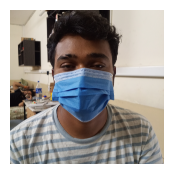

TEST IMAGE------------------------------


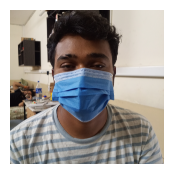

//content/drive/MyDrive/1. Colab Notebooks/5. June 2023/2. Internship/MODEL5 - Resnet50 Unmasked train-set/Face dataset/train/Abhishek/m1.jpg
Similarity Score  :0.9999997


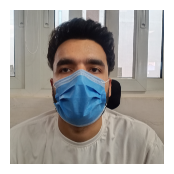

//content/drive/MyDrive/1. Colab Notebooks/5. June 2023/2. Internship/MODEL5 - Resnet50 Unmasked train-set/Face dataset/train/Rahul_thakur/m1.jpg
Similarity Score  :0.730305


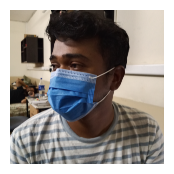

//content/drive/MyDrive/1. Colab Notebooks/5. June 2023/2. Internship/MODEL5 - Resnet50 Unmasked train-set/Face dataset/train/Abhishek/m2.jpg
Similarity Score  :0.72030544


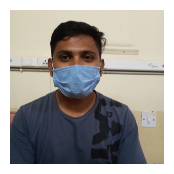

//content/drive/MyDrive/1. Colab Notebooks/5. June 2023/2. Internship/MODEL5 - Resnet50 Unmasked train-set/Face dataset/train/Anna/m1.jpg
Similarity Score  :0.6713236


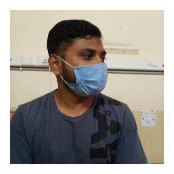

//content/drive/MyDrive/1. Colab Notebooks/5. June 2023/2. Internship/MODEL5 - Resnet50 Unmasked train-set/Face dataset/train/Anna/m4.jpg
Similarity Score  :0.65859187


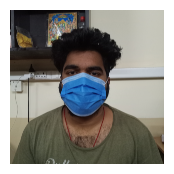

//content/drive/MyDrive/1. Colab Notebooks/5. June 2023/2. Internship/MODEL5 - Resnet50 Unmasked train-set/Face dataset/train/Mohith_Ciga/m1.jpg
Similarity Score  :0.64725435


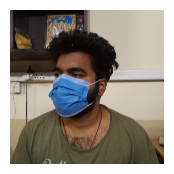

//content/drive/MyDrive/1. Colab Notebooks/5. June 2023/2. Internship/MODEL5 - Resnet50 Unmasked train-set/Face dataset/train/Mohith_Ciga/m2.jpg
Similarity Score  :0.6464904


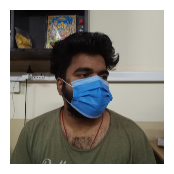

//content/drive/MyDrive/1. Colab Notebooks/5. June 2023/2. Internship/MODEL5 - Resnet50 Unmasked train-set/Face dataset/train/Mohith_Ciga/m4.jpg
Similarity Score  :0.63258374


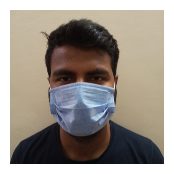

//content/drive/MyDrive/1. Colab Notebooks/5. June 2023/2. Internship/MODEL5 - Resnet50 Unmasked train-set/Face dataset/train/Rahul_kumar/m1.jpg
Similarity Score  :0.6298885


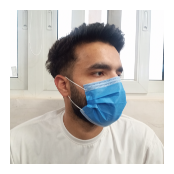

//content/drive/MyDrive/1. Colab Notebooks/5. June 2023/2. Internship/MODEL5 - Resnet50 Unmasked train-set/Face dataset/train/Rahul_thakur/m4.jpg
Similarity Score  :0.6098418


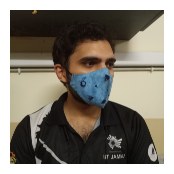

//content/drive/MyDrive/1. Colab Notebooks/5. June 2023/2. Internship/MODEL5 - Resnet50 Unmasked train-set/Face dataset/train/Himanshu/m4.jpg
Similarity Score  :0.60423833


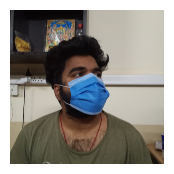

//content/drive/MyDrive/1. Colab Notebooks/5. June 2023/2. Internship/MODEL5 - Resnet50 Unmasked train-set/Face dataset/train/Mohith_Ciga/m9.jpg
Similarity Score  :0.5899001


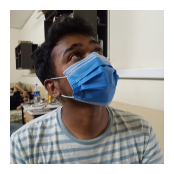

//content/drive/MyDrive/1. Colab Notebooks/5. June 2023/2. Internship/MODEL5 - Resnet50 Unmasked train-set/Face dataset/train/Abhishek/m9.jpg
Similarity Score  :0.5844305


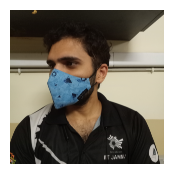

//content/drive/MyDrive/1. Colab Notebooks/5. June 2023/2. Internship/MODEL5 - Resnet50 Unmasked train-set/Face dataset/train/Himanshu/m2.jpg
Similarity Score  :0.57996356


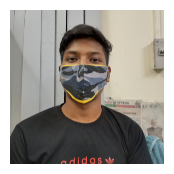

//content/drive/MyDrive/1. Colab Notebooks/5. June 2023/2. Internship/MODEL5 - Resnet50 Unmasked train-set/Face dataset/train/Rohan/m1.jpg
Similarity Score  :0.5731626


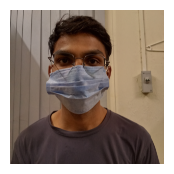

//content/drive/MyDrive/1. Colab Notebooks/5. June 2023/2. Internship/MODEL5 - Resnet50 Unmasked train-set/Face dataset/train/Ayush/m1.jpg
Similarity Score  :0.56527996


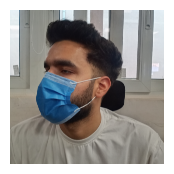

//content/drive/MyDrive/1. Colab Notebooks/5. June 2023/2. Internship/MODEL5 - Resnet50 Unmasked train-set/Face dataset/train/Rahul_thakur/m2.jpg
Similarity Score  :0.5569514


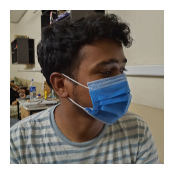

//content/drive/MyDrive/1. Colab Notebooks/5. June 2023/2. Internship/MODEL5 - Resnet50 Unmasked train-set/Face dataset/train/Abhishek/m4.jpg
Similarity Score  :0.5545081


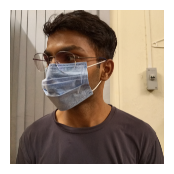

//content/drive/MyDrive/1. Colab Notebooks/5. June 2023/2. Internship/MODEL5 - Resnet50 Unmasked train-set/Face dataset/train/Ayush/m2.jpg
Similarity Score  :0.53902733


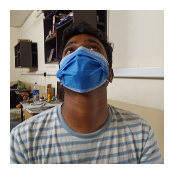

//content/drive/MyDrive/1. Colab Notebooks/5. June 2023/2. Internship/MODEL5 - Resnet50 Unmasked train-set/Face dataset/train/Abhishek/m6.jpg
Similarity Score  :0.52853745


In [ ]:
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline



#test image print
test_image_path  = '/content/drive/MyDrive/1. Colab Notebooks/5. June 2023/2. Internship/MODEL5 - Resnet50 Unmasked train-set/Face dataset/3. Masked test /Abhishek m1.jpg'
plt.figure(figsize=(3, 2))
image = Image.open(test_image_path)
plt.figure(figsize=(3, 2))
plt.imshow(image)
plt.axis('off')  # Remove the axes
plt.show()

print("TEST IMAGE------------------------------")


for i in range(20):
    image_path, similarity_score = similarity_scores[i]
    image = Image.open(image_path)
    plt.figure(figsize=(3, 2))
    plt.imshow(image)
    plt.axis('off')  # Remove the axes
    plt.show()
    print(image_path)
    print("Similarity Score  :" + str(similarity_score))


ANNA

In [ ]:
test_image_path = '/content/drive/MyDrive/1. Colab Notebooks/5. June 2023/2. Internship/MODEL5 - Resnet50 Unmasked train-set/Face dataset/3. Masked test /Anna m2.jpg'


# Load and preprocess the test image
test_image = load_img(test_image_path, target_size=(224, 224))
test_image = img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
test_image = preprocess_input(test_image)

# Extract features from the test image
test_features = model1.predict(test_image)
test_features = test_features.reshape(1, -1)

# Initialize an empty list to store similarity scores
similarity_scores = []

# Iterate through the train set folders
for folder_name in os.listdir(train_set_path):
    folder_path = os.path.join(train_set_path, folder_name)

# Iterate through the images in each folder
    for file_name in os.listdir(folder_path):
        image_path = os.path.join(folder_path, file_name)

        # Load and preprocess the train image
        train_image = load_img(image_path, target_size=(224, 224))
        train_image = img_to_array(train_image)
        train_image = np.expand_dims(train_image, axis=0)
        train_image = preprocess_input(train_image)

        # Extract features from the train image
        train_features = model1.predict(train_image)
        train_features = train_features.reshape(1, -1)

        # Compute cosine similarity between the test and train images
        similarity_score = cosine_similarity(test_features, train_features)[0][0]

        # Append the similarity score to the list
        similarity_scores.append((image_path, similarity_score))

# Sort the similarity scores in descending order
similarity_scores.sort(key=lambda x: x[1], reverse=True)

# Print the top 10 matched images with their similarity scores
for i in range(20):
    image_path, similarity_score = similarity_scores[i]
    similarity_percentage = similarity_score * 100
    print(f"Similarity: {similarity_percentage:.2f}% - Image: {image_path}")

1/1 [==============================] - 0s 44ms/step
Similarity: 78.74% - Image: //content/drive/MyDrive/1. Colab Notebooks/5. June 2023/2. Internship/MODEL5 - Resnet50 Unmasked train-set/Face dataset/train/Anna/m1.jpg
Similarity: 74.18% - Image: //content/drive/MyDrive/1. Colab Notebooks/5. June 2023/2. Internship/MODEL5 - Resnet50 Unmasked train-set/Face dataset/train/Anna/m4.jpg
Similarity: 69.56% - Image: //content/drive/MyDrive/1. Colab Notebooks/5. June 2023/2. Internship/MODEL5 - Resnet50 Unmasked train-set/Face dataset/train/Anna/m3.jpg
Similarity: 67.33% - Image: //content/drive/MyDrive/1. Colab Notebooks/5. June 2023/2. Internship/MODEL5 - Resnet50 Unmasked train-set/Face dataset/train/Anna/m8.jpg
Similarity: 63.72% - Image: //content/drive/MyDrive/1. Colab Notebooks/5. June 2023/2. Internship/MODEL5 - Resnet50 Unmasked train-set/Face dataset/train/Anna/m10.jpg
Similarity: 62.18% - Image: //content/drive/MyDrive/1. Colab Notebooks/5. June 2023/2. Internship/MODEL5 - Resnet50 U

<Figure size 300x200 with 0 Axes>

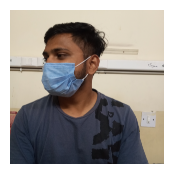

TEST IMAGE------------------------------


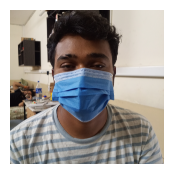

//content/drive/MyDrive/1. Colab Notebooks/5. June 2023/2. Internship/MODEL5 - Resnet50 Unmasked train-set/Face dataset/train/Abhishek/m1.jpg
Similarity Score  :0.9999997


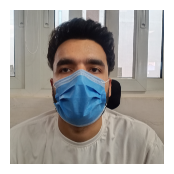

//content/drive/MyDrive/1. Colab Notebooks/5. June 2023/2. Internship/MODEL5 - Resnet50 Unmasked train-set/Face dataset/train/Rahul_thakur/m1.jpg
Similarity Score  :0.730305


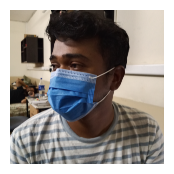

//content/drive/MyDrive/1. Colab Notebooks/5. June 2023/2. Internship/MODEL5 - Resnet50 Unmasked train-set/Face dataset/train/Abhishek/m2.jpg
Similarity Score  :0.72030544


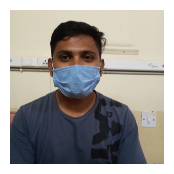

//content/drive/MyDrive/1. Colab Notebooks/5. June 2023/2. Internship/MODEL5 - Resnet50 Unmasked train-set/Face dataset/train/Anna/m1.jpg
Similarity Score  :0.6713236


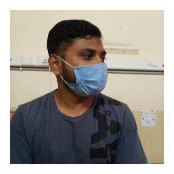

//content/drive/MyDrive/1. Colab Notebooks/5. June 2023/2. Internship/MODEL5 - Resnet50 Unmasked train-set/Face dataset/train/Anna/m4.jpg
Similarity Score  :0.65859187


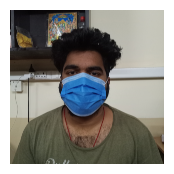

//content/drive/MyDrive/1. Colab Notebooks/5. June 2023/2. Internship/MODEL5 - Resnet50 Unmasked train-set/Face dataset/train/Mohith_Ciga/m1.jpg
Similarity Score  :0.64725435


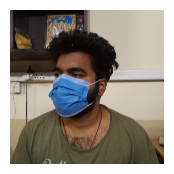

//content/drive/MyDrive/1. Colab Notebooks/5. June 2023/2. Internship/MODEL5 - Resnet50 Unmasked train-set/Face dataset/train/Mohith_Ciga/m2.jpg
Similarity Score  :0.6464904


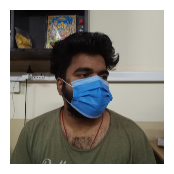

//content/drive/MyDrive/1. Colab Notebooks/5. June 2023/2. Internship/MODEL5 - Resnet50 Unmasked train-set/Face dataset/train/Mohith_Ciga/m4.jpg
Similarity Score  :0.63258374


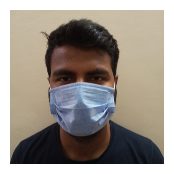

//content/drive/MyDrive/1. Colab Notebooks/5. June 2023/2. Internship/MODEL5 - Resnet50 Unmasked train-set/Face dataset/train/Rahul_kumar/m1.jpg
Similarity Score  :0.6298885


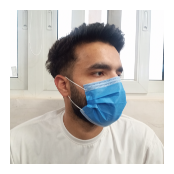

//content/drive/MyDrive/1. Colab Notebooks/5. June 2023/2. Internship/MODEL5 - Resnet50 Unmasked train-set/Face dataset/train/Rahul_thakur/m4.jpg
Similarity Score  :0.6098418


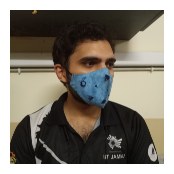

//content/drive/MyDrive/1. Colab Notebooks/5. June 2023/2. Internship/MODEL5 - Resnet50 Unmasked train-set/Face dataset/train/Himanshu/m4.jpg
Similarity Score  :0.60423833


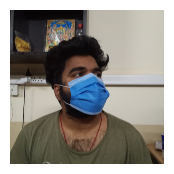

//content/drive/MyDrive/1. Colab Notebooks/5. June 2023/2. Internship/MODEL5 - Resnet50 Unmasked train-set/Face dataset/train/Mohith_Ciga/m9.jpg
Similarity Score  :0.5899001


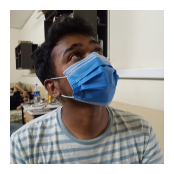

//content/drive/MyDrive/1. Colab Notebooks/5. June 2023/2. Internship/MODEL5 - Resnet50 Unmasked train-set/Face dataset/train/Abhishek/m9.jpg
Similarity Score  :0.5844305


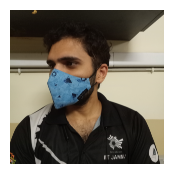

//content/drive/MyDrive/1. Colab Notebooks/5. June 2023/2. Internship/MODEL5 - Resnet50 Unmasked train-set/Face dataset/train/Himanshu/m2.jpg
Similarity Score  :0.57996356


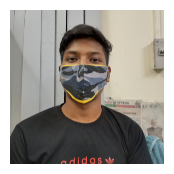

//content/drive/MyDrive/1. Colab Notebooks/5. June 2023/2. Internship/MODEL5 - Resnet50 Unmasked train-set/Face dataset/train/Rohan/m1.jpg
Similarity Score  :0.5731626


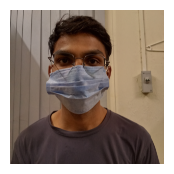

//content/drive/MyDrive/1. Colab Notebooks/5. June 2023/2. Internship/MODEL5 - Resnet50 Unmasked train-set/Face dataset/train/Ayush/m1.jpg
Similarity Score  :0.56527996


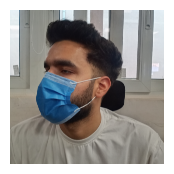

//content/drive/MyDrive/1. Colab Notebooks/5. June 2023/2. Internship/MODEL5 - Resnet50 Unmasked train-set/Face dataset/train/Rahul_thakur/m2.jpg
Similarity Score  :0.5569514


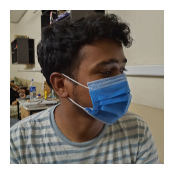

//content/drive/MyDrive/1. Colab Notebooks/5. June 2023/2. Internship/MODEL5 - Resnet50 Unmasked train-set/Face dataset/train/Abhishek/m4.jpg
Similarity Score  :0.5545081


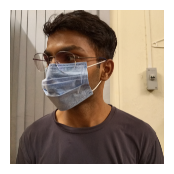

//content/drive/MyDrive/1. Colab Notebooks/5. June 2023/2. Internship/MODEL5 - Resnet50 Unmasked train-set/Face dataset/train/Ayush/m2.jpg
Similarity Score  :0.53902733


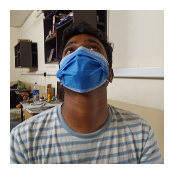

//content/drive/MyDrive/1. Colab Notebooks/5. June 2023/2. Internship/MODEL5 - Resnet50 Unmasked train-set/Face dataset/train/Abhishek/m6.jpg
Similarity Score  :0.52853745


In [ ]:
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline



#test image print
test_image_path  = '/content/drive/MyDrive/1. Colab Notebooks/5. June 2023/2. Internship/MODEL5 - Resnet50 Unmasked train-set/Face dataset/3. Masked test /Anna m2.jpg'
plt.figure(figsize=(3, 2))
image = Image.open(test_image_path)
plt.figure(figsize=(3, 2))
plt.imshow(image)
plt.axis('off')  # Remove the axes
plt.show()

print("TEST IMAGE------------------------------")


for i in range(20):
    image_path, similarity_score = similarity_scores[i]
    image = Image.open(image_path)
    plt.figure(figsize=(3, 2))
    plt.imshow(image)
    plt.axis('off')  # Remove the axes
    plt.show()
    print(image_path)
    print("Similarity Score  :" + str(similarity_score))


### Unknown varun

In [ ]:
test_image_path = '/content/drive/MyDrive/1. Colab Notebooks/5. June 2023/2. Internship/MODEL5 - Resnet50 Unmasked train-set/Face dataset/3. Masked test /Varun masked1(Unknown).jpg'


# Load and preprocess the test image
test_image = load_img(test_image_path, target_size=(224, 224))
test_image = img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
test_image = preprocess_input(test_image)

# Extract features from the test image
test_features = model1.predict(test_image)
test_features = test_features.reshape(1, -1)

# Initialize an empty list to store similarity scores
similarity_scores = []

# Iterate through the train set folders
for folder_name in os.listdir(train_set_path):
    folder_path = os.path.join(train_set_path, folder_name)

# Iterate through the images in each folder
    for file_name in os.listdir(folder_path):
        image_path = os.path.join(folder_path, file_name)

        # Load and preprocess the train image
        train_image = load_img(image_path, target_size=(224, 224))
        train_image = img_to_array(train_image)
        train_image = np.expand_dims(train_image, axis=0)
        train_image = preprocess_input(train_image)

        # Extract features from the train image
        train_features = model1.predict(train_image)
        train_features = train_features.reshape(1, -1)

        # Compute cosine similarity between the test and train images
        similarity_score = cosine_similarity(test_features, train_features)[0][0]

        # Append the similarity score to the list
        similarity_scores.append((image_path, similarity_score))

# Sort the similarity scores in descending order
similarity_scores.sort(key=lambda x: x[1], reverse=True)

# Print the top 10 matched images with their similarity scores
for i in range(20):
    image_path, similarity_score = similarity_scores[i]
    similarity_percentage = similarity_score * 100
    print(f"Similarity: {similarity_percentage:.2f}% - Image: {image_path}")

1/1 [==============================] - 0s 22ms/step
Similarity: 41.33% - Image: //content/drive/MyDrive/1. Colab Notebooks/5. June 2023/2. Internship/MODEL5 - Resnet50 Unmasked train-set/Face dataset/train/Ambuj/m7.jpeg
Similarity: 40.42% - Image: //content/drive/MyDrive/1. Colab Notebooks/5. June 2023/2. Internship/MODEL5 - Resnet50 Unmasked train-set/Face dataset/train/Ambuj/m6.jpeg
Similarity: 40.41% - Image: //content/drive/MyDrive/1. Colab Notebooks/5. June 2023/2. Internship/MODEL5 - Resnet50 Unmasked train-set/Face dataset/train/Ayush/m11.jpg
Similarity: 40.13% - Image: //content/drive/MyDrive/1. Colab Notebooks/5. June 2023/2. Internship/MODEL5 - Resnet50 Unmasked train-set/Face dataset/train/Rahul_thakur/m7.jpg
Similarity: 40.11% - Image: //content/drive/MyDrive/1. Colab Notebooks/5. June 2023/2. Internship/MODEL5 - Resnet50 Unmasked train-set/Face dataset/train/Mohith_Ciga/m11.jpg
Similarity: 40.05% - Image: //content/drive/MyDrive/1. Colab Notebooks/5. June 2023/2. Internshi

<Figure size 300x200 with 0 Axes>

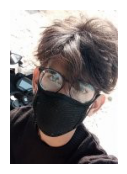

TEST IMAGE------------------------------


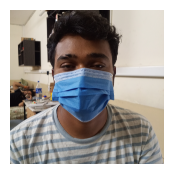

//content/drive/MyDrive/1. Colab Notebooks/5. June 2023/2. Internship/MODEL5 - Resnet50 Unmasked train-set/Face dataset/train/Abhishek/m1.jpg
Similarity Score  :0.9999997


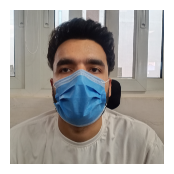

//content/drive/MyDrive/1. Colab Notebooks/5. June 2023/2. Internship/MODEL5 - Resnet50 Unmasked train-set/Face dataset/train/Rahul_thakur/m1.jpg
Similarity Score  :0.730305


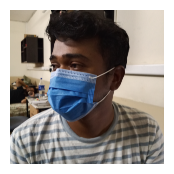

//content/drive/MyDrive/1. Colab Notebooks/5. June 2023/2. Internship/MODEL5 - Resnet50 Unmasked train-set/Face dataset/train/Abhishek/m2.jpg
Similarity Score  :0.72030544


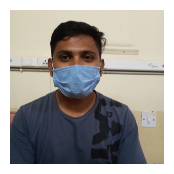

//content/drive/MyDrive/1. Colab Notebooks/5. June 2023/2. Internship/MODEL5 - Resnet50 Unmasked train-set/Face dataset/train/Anna/m1.jpg
Similarity Score  :0.6713236


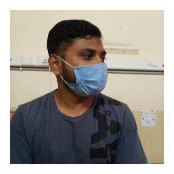

//content/drive/MyDrive/1. Colab Notebooks/5. June 2023/2. Internship/MODEL5 - Resnet50 Unmasked train-set/Face dataset/train/Anna/m4.jpg
Similarity Score  :0.65859187


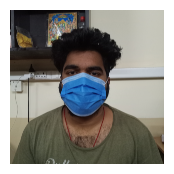

//content/drive/MyDrive/1. Colab Notebooks/5. June 2023/2. Internship/MODEL5 - Resnet50 Unmasked train-set/Face dataset/train/Mohith_Ciga/m1.jpg
Similarity Score  :0.64725435


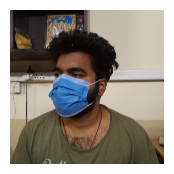

//content/drive/MyDrive/1. Colab Notebooks/5. June 2023/2. Internship/MODEL5 - Resnet50 Unmasked train-set/Face dataset/train/Mohith_Ciga/m2.jpg
Similarity Score  :0.6464904


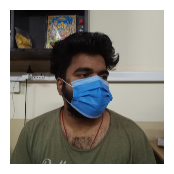

//content/drive/MyDrive/1. Colab Notebooks/5. June 2023/2. Internship/MODEL5 - Resnet50 Unmasked train-set/Face dataset/train/Mohith_Ciga/m4.jpg
Similarity Score  :0.63258374


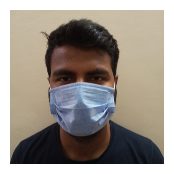

//content/drive/MyDrive/1. Colab Notebooks/5. June 2023/2. Internship/MODEL5 - Resnet50 Unmasked train-set/Face dataset/train/Rahul_kumar/m1.jpg
Similarity Score  :0.6298885


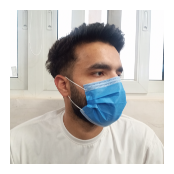

//content/drive/MyDrive/1. Colab Notebooks/5. June 2023/2. Internship/MODEL5 - Resnet50 Unmasked train-set/Face dataset/train/Rahul_thakur/m4.jpg
Similarity Score  :0.6098418


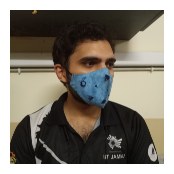

//content/drive/MyDrive/1. Colab Notebooks/5. June 2023/2. Internship/MODEL5 - Resnet50 Unmasked train-set/Face dataset/train/Himanshu/m4.jpg
Similarity Score  :0.60423833


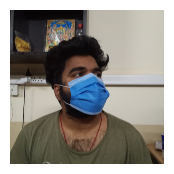

//content/drive/MyDrive/1. Colab Notebooks/5. June 2023/2. Internship/MODEL5 - Resnet50 Unmasked train-set/Face dataset/train/Mohith_Ciga/m9.jpg
Similarity Score  :0.5899001


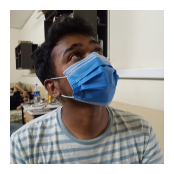

//content/drive/MyDrive/1. Colab Notebooks/5. June 2023/2. Internship/MODEL5 - Resnet50 Unmasked train-set/Face dataset/train/Abhishek/m9.jpg
Similarity Score  :0.5844305


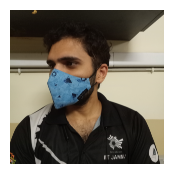

//content/drive/MyDrive/1. Colab Notebooks/5. June 2023/2. Internship/MODEL5 - Resnet50 Unmasked train-set/Face dataset/train/Himanshu/m2.jpg
Similarity Score  :0.57996356


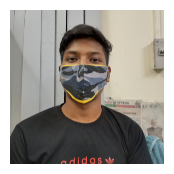

//content/drive/MyDrive/1. Colab Notebooks/5. June 2023/2. Internship/MODEL5 - Resnet50 Unmasked train-set/Face dataset/train/Rohan/m1.jpg
Similarity Score  :0.5731626


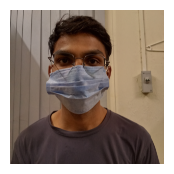

//content/drive/MyDrive/1. Colab Notebooks/5. June 2023/2. Internship/MODEL5 - Resnet50 Unmasked train-set/Face dataset/train/Ayush/m1.jpg
Similarity Score  :0.56527996


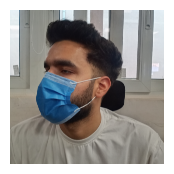

//content/drive/MyDrive/1. Colab Notebooks/5. June 2023/2. Internship/MODEL5 - Resnet50 Unmasked train-set/Face dataset/train/Rahul_thakur/m2.jpg
Similarity Score  :0.5569514


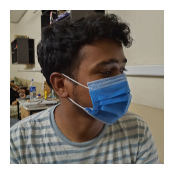

//content/drive/MyDrive/1. Colab Notebooks/5. June 2023/2. Internship/MODEL5 - Resnet50 Unmasked train-set/Face dataset/train/Abhishek/m4.jpg
Similarity Score  :0.5545081


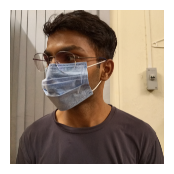

//content/drive/MyDrive/1. Colab Notebooks/5. June 2023/2. Internship/MODEL5 - Resnet50 Unmasked train-set/Face dataset/train/Ayush/m2.jpg
Similarity Score  :0.53902733


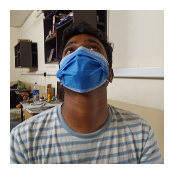

//content/drive/MyDrive/1. Colab Notebooks/5. June 2023/2. Internship/MODEL5 - Resnet50 Unmasked train-set/Face dataset/train/Abhishek/m6.jpg
Similarity Score  :0.52853745


In [ ]:
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline



#test image print
test_image_path  = '/content/drive/MyDrive/1. Colab Notebooks/5. June 2023/2. Internship/MODEL5 - Resnet50 Unmasked train-set/Face dataset/3. Masked test /Varun masked1(Unknown).jpg'
plt.figure(figsize=(3, 2))
image = Image.open(test_image_path)
plt.figure(figsize=(3, 2))
plt.imshow(image)
plt.axis('off')  # Remove the axes
plt.show()

print("TEST IMAGE------------------------------")


for i in range(20):
    image_path, similarity_score = similarity_scores[i]
    image = Image.open(image_path)
    plt.figure(figsize=(3, 2))
    plt.imshow(image)
    plt.axis('off')  # Remove the axes
    plt.show()
    print(image_path)
    print("Similarity Score  :" + str(similarity_score))
